### Importing necessary modules,functions and libraries

In [1]:
#To supress unneccesary warnings 
import warnings
warnings.filterwarnings('ignore')

#Importing basic data handling libraries
import pandas as pd
import numpy as np

#importing visualising modules
import matplotlib.pyplot as plt
import seaborn as sns

#importing statistical libraries
from scipy import stats
import statsmodels.api as sm

#impoting sklearn functions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import classification_report,recall_score,roc_auc_score,roc_curve,accuracy_score,precision_score,precision_recall_curve,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer

Setting pd.set options to display the dataset correctly

In [2]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_colwidth",200)

### Importing Dataset

In [3]:
# Initialing a variable "path" for storing the file path
# Doing so to ensure that anyone from git can compile the file by just changing the value of path variable
path = 'Leads.csv'
lead_df = pd.read_csv(path)

### INSPECTING AND UNDERSTANDING THE DATASET

In [4]:
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
lead_df.shape

(9240, 37)

In [6]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
lead_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [8]:
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [9]:
round((lead_df.isnull().sum()/lead_df.shape[0]).sort_values(ascending=False)*100,2)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [10]:
lead_df.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

### Deciding to get rid of columns with missing values > 3000 
    removing because they seem of low sifnificance given that the data only has 9240 rows to start with

In [11]:
for c in lead_df.columns:
    if lead_df[c].isnull().sum()>3000:
        lead_df.drop(c, axis=1,inplace=True)

    Checking the missing values again

In [12]:
lead_df.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Newspaper                                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement       

    - City and County seem to be 2 columns highlighting the similar geographic significance.
    - One of them can be removed.
    - need some clarity on the same

In [13]:
lead_df['City'].value_counts(dropna=False)

Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [14]:
lead_df['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

    None of the columns seem of significance given that: 
    - City has most data of 'Mumbai' 
    - Country has most data of India

    Deciding to get rid of both the columns 

In [15]:
lead_df.drop(['Country'], axis = 1, inplace = True)
lead_df.drop(['City'], axis = 1, inplace = True)

    Checking the missing values percentage again in dataset

In [16]:
round((lead_df.isnull().sum()/lead_df.shape[0]).sort_values(ascending=False)*100,2)

What matters most to you in choosing a course    29.32
Lead Profile                                     29.32
What is your current occupation                  29.11
How did you hear about X Education               23.89
Specialization                                   15.56
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Get updates on DM Content                         0.00
Update me on Supply Chain Content                 0.00
X Education Forums                                0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Receive More Updates About Our Courses            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
Prospect I

    While dropping city column saw 'Select' value present in dataset.
    Checking how many columns have this value to understand it's significance
    

In [17]:
for column in lead_df:
    print(lead_df[column].astype('category').value_counts())
    print('___________________________________________________')

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
___________________________________________________
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
___________________________________________________
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
__________________

    How did you hear about X Education,Lead Profile and Specialization columns seem to have select as value,
    plotting to see the data spread between select value and other distinct values

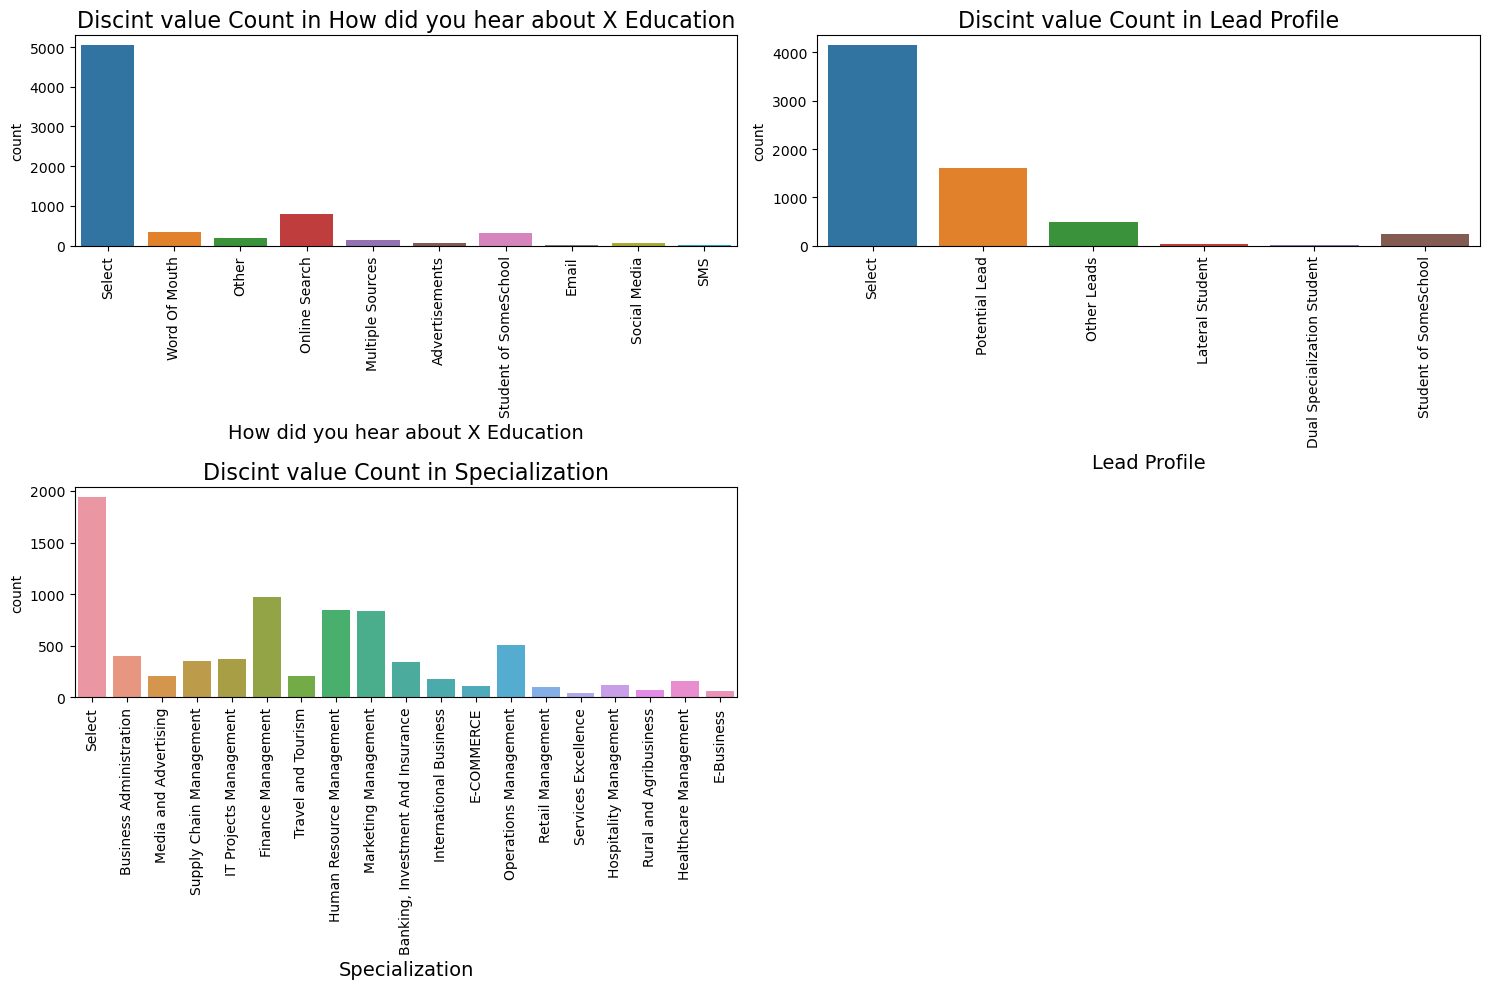

In [18]:
def countplot(x_col, fig):
    plt.subplot(2,2, fig)
    sns.countplot(data=lead_df,x=x_col)
    plt.title('Discint value Count in'+' '+ x_col, size = 16)
    plt.xlabel(x_col,size = 14)
    plt.xticks(rotation = 90)

plt.figure(figsize=(15,10))

countplot('How did you hear about X Education',1)
countplot('Lead Profile',2)
countplot('Specialization',3)



plt.tight_layout()

- Based on the above plot, can see that Lead Profile and How did you hear about X Education have a lot of rows which have the value 'Select'.
- Deciding to get rid of these values since Select seems to mean that the student had not selected any option while form filling.
- These values are as good as missing values so better to get rid of them

In [19]:
lead_df.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)

    Also can be seen from value count that their are few columns with high imbalance ( majority of one value present ) 
    Following are such Columns
    Do Not Call,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,What matters most to you in choosing a course
    Deciding to drop these columns to remove imbalance
    

In [20]:
lead_df.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque','What matters most to you in choosing a course'], axis = 1, inplace = True)

    Checking the missing values again

In [21]:
lead_df.isnull().sum().sort_values(ascending=False)

What is your current occupation           2690
Specialization                            1438
TotalVisits                                137
Page Views Per Visit                       137
Last Activity                              103
Lead Source                                 36
Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Do Not Email                                 0
Converted                                    0
Total Time Spent on Website                  0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

    Prospect ID and Lead Number are of no significance, getting rid of the same

In [22]:
lead_df.drop(['Prospect ID','Lead Number'], axis = 1, inplace = True)

In [23]:
lead_df.isnull().sum().sort_values(ascending=False)

What is your current occupation           2690
Specialization                            1438
TotalVisits                                137
Page Views Per Visit                       137
Last Activity                              103
Lead Source                                 36
Lead Origin                                  0
Do Not Email                                 0
Converted                                    0
Total Time Spent on Website                  0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

    Inspecting column with highest missing values now
    - What is your current occupation

In [24]:
lead_df['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

In [25]:
lead_df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

    Given the count of NaN, Imputing with Mode value seems to hamper data accuracy greatly
    Inspecting the data after droping the NaN from the above mentioned column

In [26]:
lead_df = lead_df[~pd.isnull(lead_df['What is your current occupation'])]

In [27]:
lead_df.isnull().sum().sort_values(ascending=False)

TotalVisits                               130
Page Views Per Visit                      130
Last Activity                             103
Lead Source                                36
Specialization                             18
Lead Origin                                 0
Do Not Email                                0
Converted                                   0
Total Time Spent on Website                 0
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [28]:
round((lead_df.isnull().sum()/lead_df.shape[0]).sort_values(ascending=False)*100,2)

TotalVisits                               1.98
Page Views Per Visit                      1.98
Last Activity                             1.57
Lead Source                               0.55
Specialization                            0.27
Lead Origin                               0.00
Do Not Email                              0.00
Converted                                 0.00
Total Time Spent on Website               0.00
What is your current occupation           0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

    Getting rid of missing values from 'What is your current occupation' seems to have taken care of missing values
    from 2nd highest column with missing values as well

    Inspecting the data after droping the NaN from the new column with highest missing values

In [29]:
lead_df = lead_df[~pd.isnull(lead_df['TotalVisits'])]

In [30]:
round((lead_df.isnull().sum()/lead_df.shape[0]).sort_values(ascending=False)*100,2)

Lead Source                               0.45
Specialization                            0.28
Lead Origin                               0.00
Do Not Email                              0.00
Converted                                 0.00
TotalVisits                               0.00
Total Time Spent on Website               0.00
Page Views Per Visit                      0.00
Last Activity                             0.00
What is your current occupation           0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

    Getting rid of missing values from 'TotalVisits' seems to have taken care of missing values
    from the other columns as well



In [31]:
lead_df.isnull().sum().sort_values(ascending=False)

Lead Source                               29
Specialization                            18
Lead Origin                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

    The missing value count seems extremely less and given the amount of trimming already done
    Deciding to impute the missing values with median for the numerical features and mode for the others

In [32]:
lead_df['Lead Source'].describe()

count       6391
unique        16
top       Google
freq        2048
Name: Lead Source, dtype: object

In [33]:
lead_df['Lead Source'].value_counts(dropna=False)

Google               2048
Direct Traffic       1891
Olark Chat            892
Organic Search        870
Reference             443
Welingak Website      129
Referral Sites         75
NaN                    29
Facebook               28
Click2call              4
bing                    3
Live Chat               2
Social Media            2
testone                 1
Pay per Click Ads       1
WeLearn                 1
Press_Release           1
Name: Lead Source, dtype: int64

In [34]:
lead_df['Specialization'].describe()

count       6402
unique        19
top       Select
freq        1860
Name: Specialization, dtype: object

In [35]:
lead_df['Specialization'].value_counts(dropna=False)

Select                               1860
Finance Management                    748
Human Resource Management             666
Marketing Management                  664
Operations Management                 392
Business Administration               310
IT Projects Management                278
Supply Chain Management               275
Banking, Investment And Insurance     266
Media and Advertising                 161
Travel and Tourism                    149
International Business                136
Healthcare Management                 123
Hospitality Management                 90
E-COMMERCE                             80
Retail Management                      78
Rural and Agribusiness                 58
E-Business                             43
Services Excellence                    25
NaN                                    18
Name: Specialization, dtype: int64

In [36]:
print(lead_df['Lead Source'].mode())
print(lead_df['Specialization'].mode())

0    Google
Name: Lead Source, dtype: object
0    Select
Name: Specialization, dtype: object


In [37]:
lead_df['Lead Source'].fillna('Google',inplace=True)
lead_df['Specialization'].fillna('Select',inplace=True)

In [38]:
lead_df.isnull().sum().sort_values(ascending=False)

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

    Checking the percentage of data retained

In [39]:
print(len(lead_df.index))
print(round((len(lead_df.index)/9240)*100,2))

6420
69.48


    Close to 69.5 percentage of original data remains post cleaning
    Good enough data to make predictions

In [40]:
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


    Reseting the index just since several rows have been deleted from the original dataset

In [41]:
lead_df.reset_index(drop=True, inplace=True)

In [42]:
lead_df.shape

(6420, 12)

### Preparing the data for modeling

    Ploting numerical variables

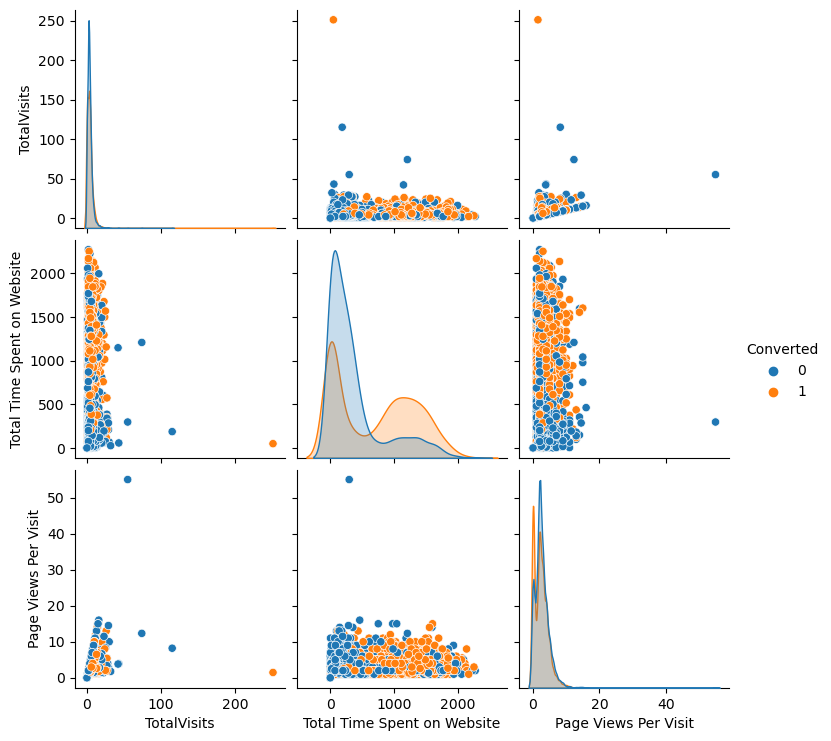

In [43]:
df_num = lead_df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']]
sns.pairplot(df_num,diag_kind='kde',hue='Converted')
plt.show()

In [44]:
# Initiating the PowerTransformer in pt
pt = PowerTransformer()
transformed_num = pd.DataFrame(pt.fit_transform(df_num))
transformed_num.columns = df_num.columns
transformed_num.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Converted
0,-1.530955,-1.525638,-1.526354,-0.963591
1,0.697556,0.647748,0.239403,-0.963591
2,-0.210545,1.262992,-0.009806,1.037785
3,-0.714248,0.162637,-0.619990,-0.963591
4,-0.210545,1.205223,-0.619990,1.037785


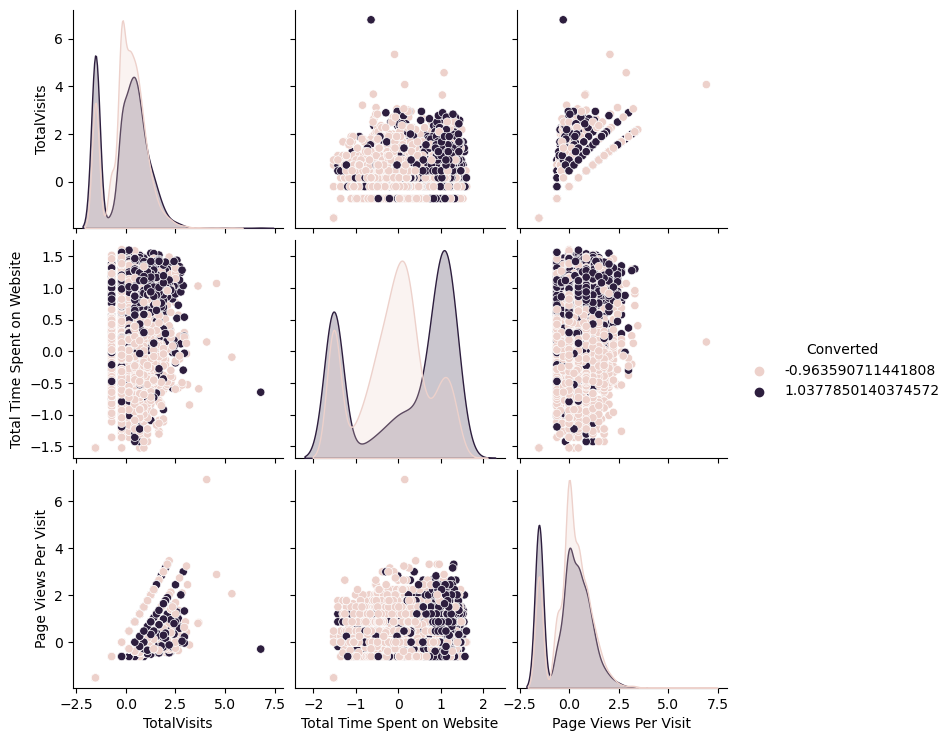

In [45]:
sns.pairplot(data=transformed_num,diag_kind='kde',hue='Converted')
plt.show()

    Plotting the categorical Variables to understand the data spread

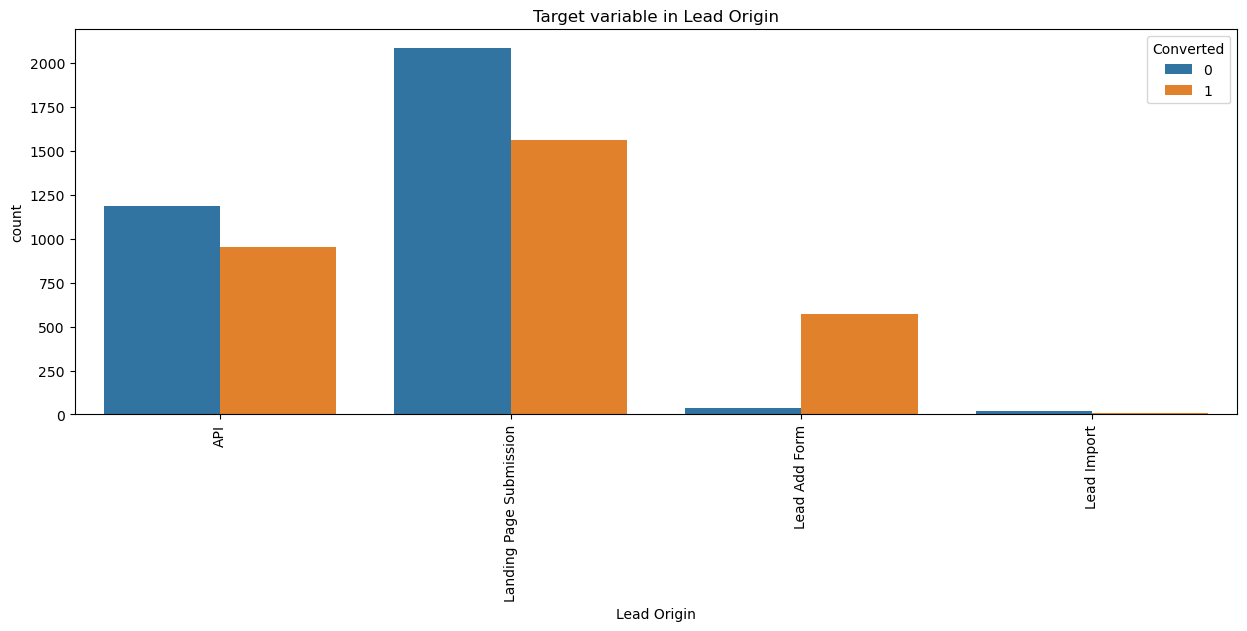

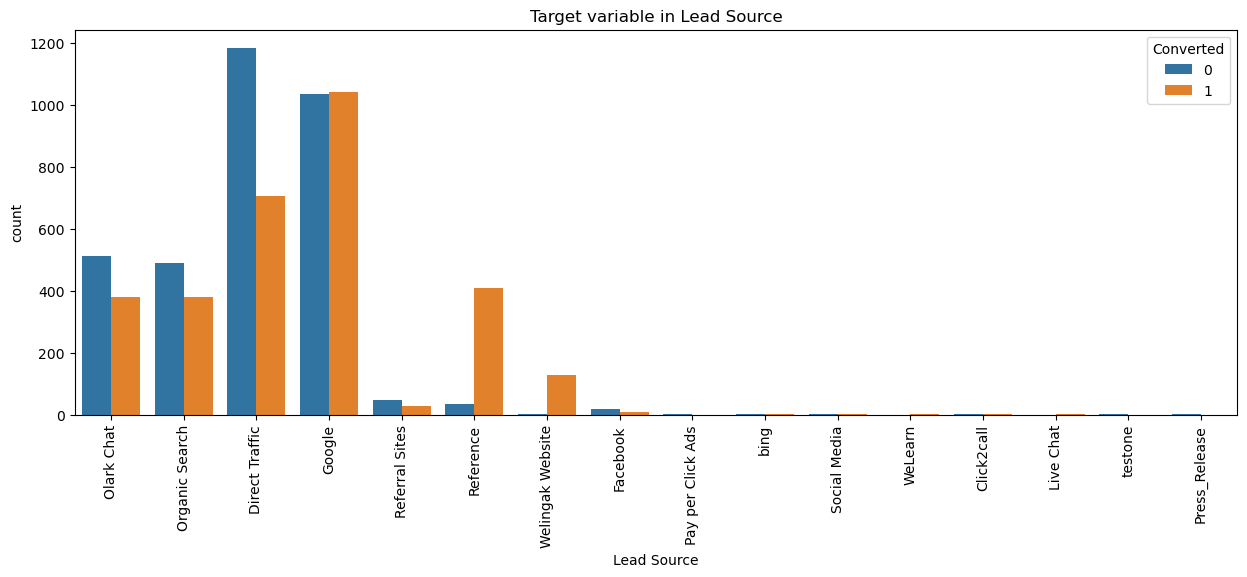

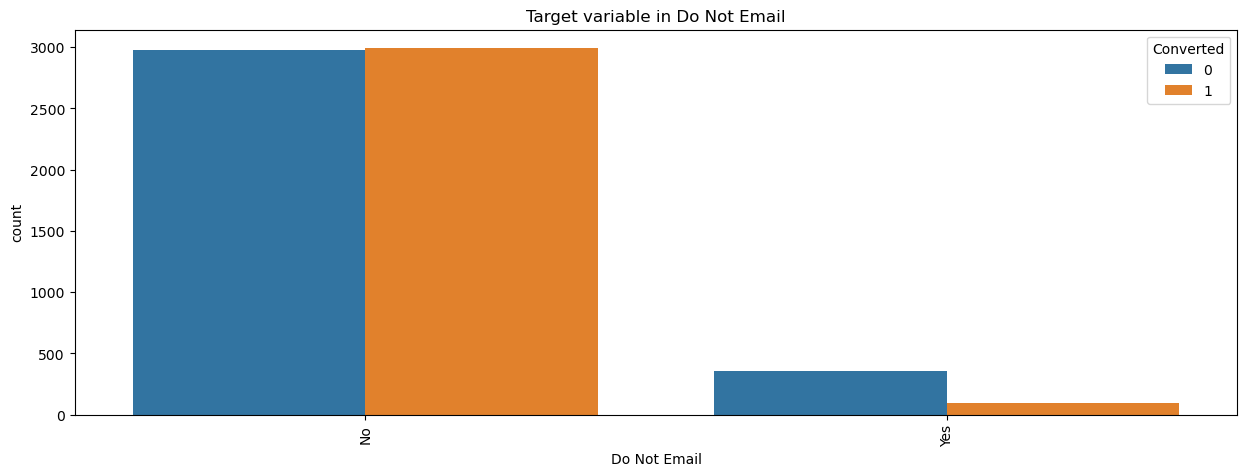

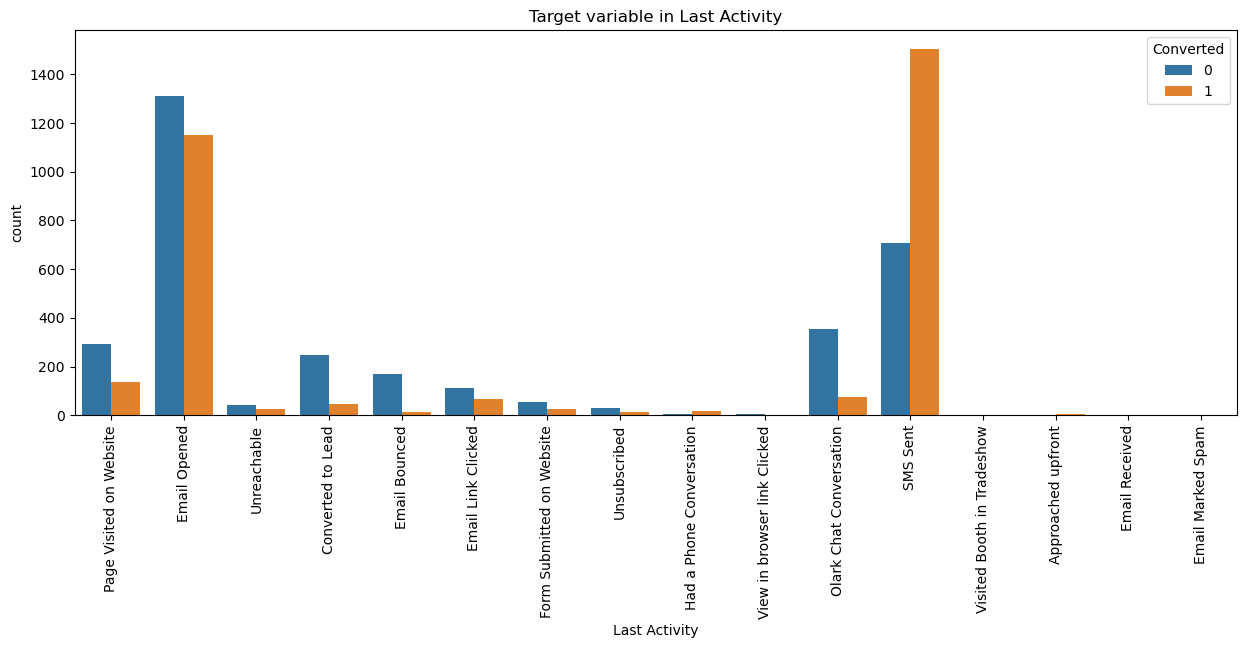

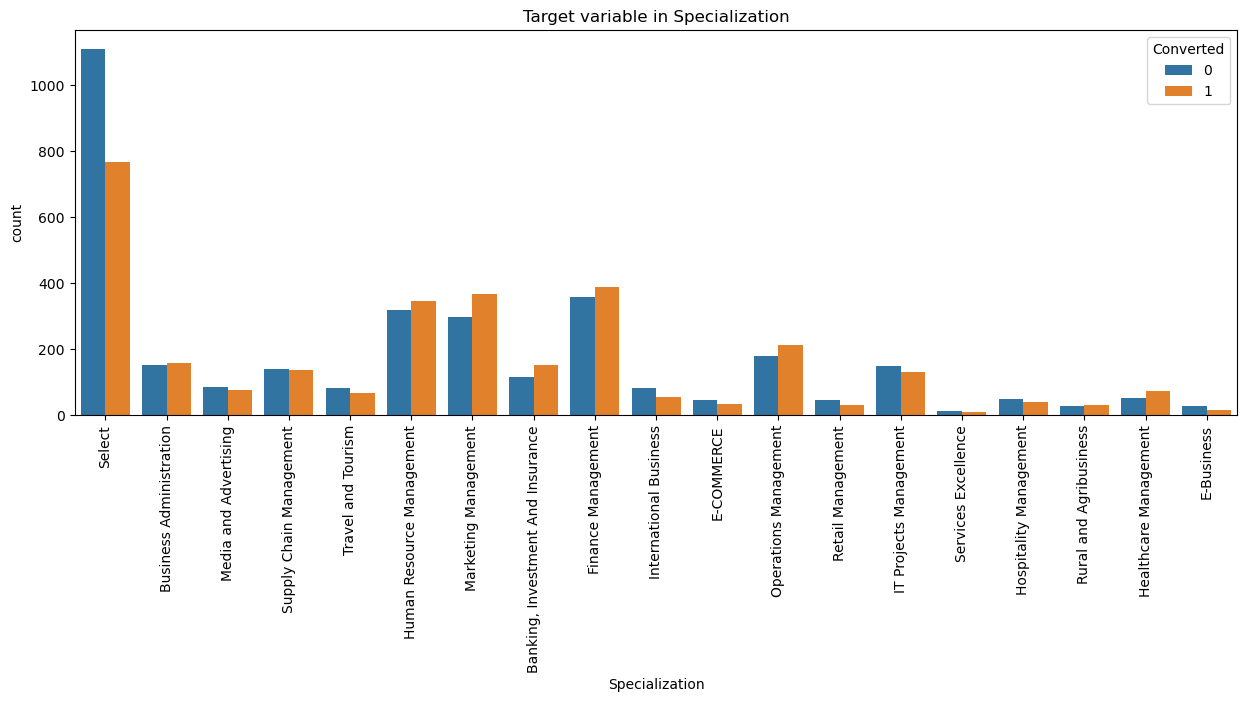

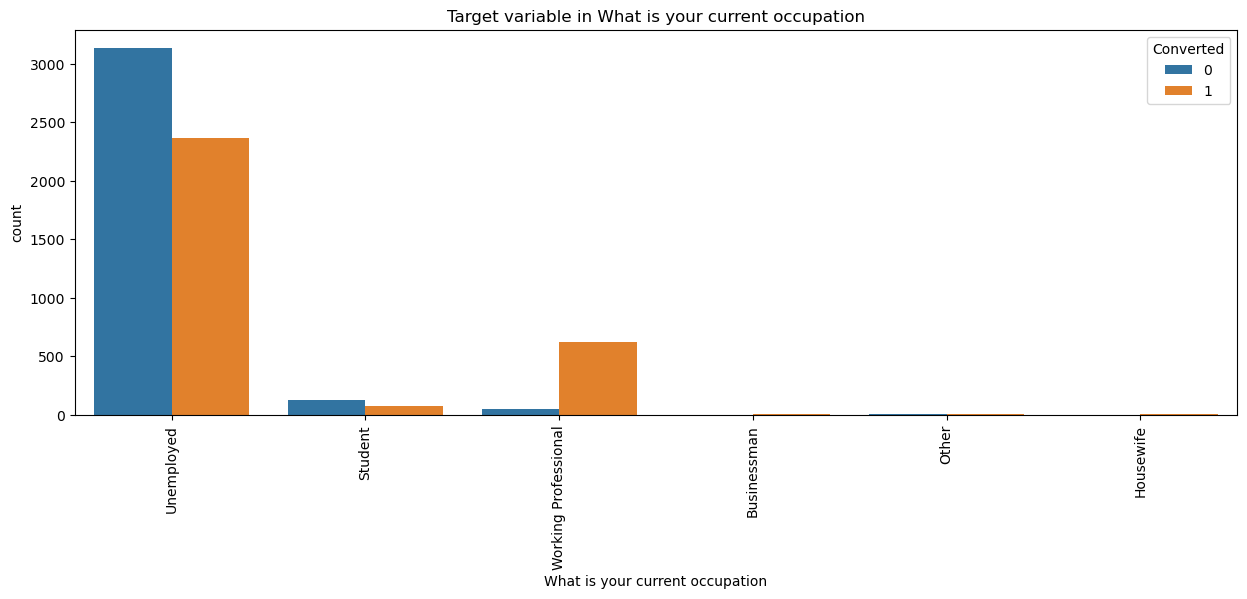

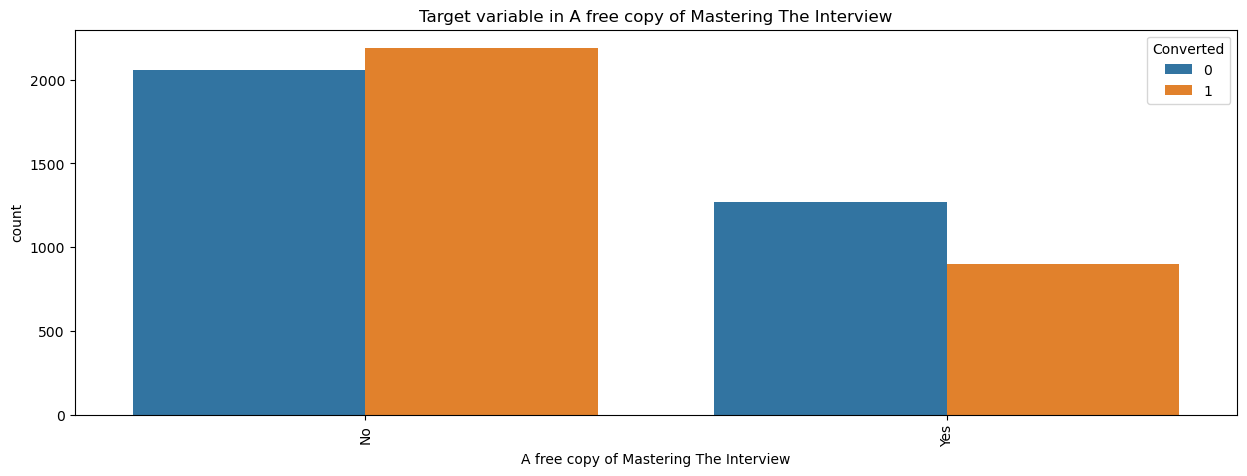

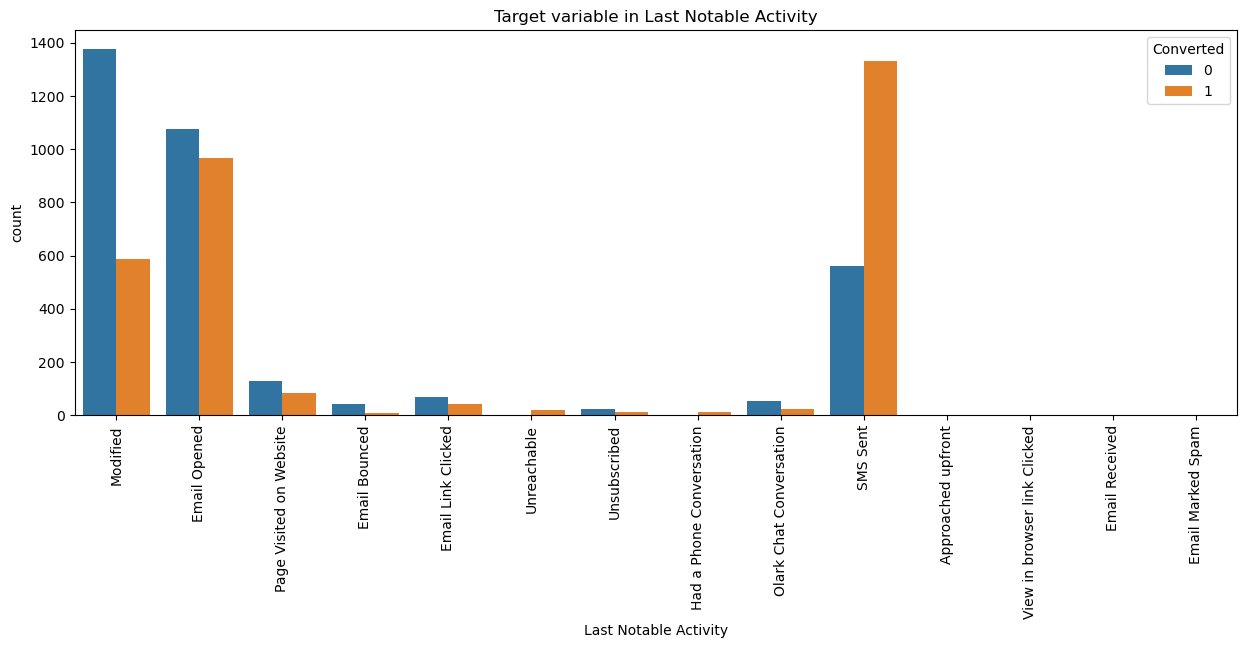

In [46]:
conv = lead_df.select_dtypes(include ="object").columns
for i in conv:
    
    plt.figure(figsize =(15,5))
    sns.countplot(data=lead_df,x=i, hue=lead_df.Converted)
    plt.xticks(rotation = 90)
    plt.title('Target variable in'+' '+ i)
    plt.xlabel(i)
    plt.show()

### Creating dummy variables

    creating dummy variables to understand the categorical variables

In [47]:
#checking the 'object' type variables

temp = lead_df.loc[:, lead_df.dtypes == 'object']
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [48]:
#creating the dummy variables for the above columns and droping the first one to decrease redundancy

dummy_var = pd.get_dummies(lead_df[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity']], drop_first=True)
lead_df = pd.concat([lead_df, dummy_var], axis=1)

In [49]:
# Handling 'Specialization' seperately to deal with the 'Select' values since they are of less significance
# Droping the 'Select' explicitly from the dummy

dummy_select = pd.get_dummies(lead_df['Specialization'], prefix = 'Specialization')
dummy_select = dummy_select.drop(['Specialization_Select'], axis=1)
lead_df = pd.concat([lead_df, dummy_select], axis = 1)

In [50]:
# Droping the master columns since dummy created
lead_df = lead_df.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], axis=1)

In [51]:
# Checking the df again to see if it worked correctly
lead_df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Creating training and testing datasets
    Using Train Test Split to split the dataframe
    splitting in 70 for train and 30 for test

In [52]:
# Seperating the features and target

X = lead_df.drop(['Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [53]:
# setting the target variable in y

y = lead_df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

    Scaling the numerical features

In [55]:
# Initiating the MinMaxScaler in scaler
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
4511,0.047619,0.084332,0.133333,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5652,0.047619,0.154461,0.066667,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3327,0.095238,0.498447,0.266667,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5142,0.119048,0.085664,0.333333,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2908,0.142857,0.234798,0.400000,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


    Checking the Correlations in dataset using corr() and heatmap

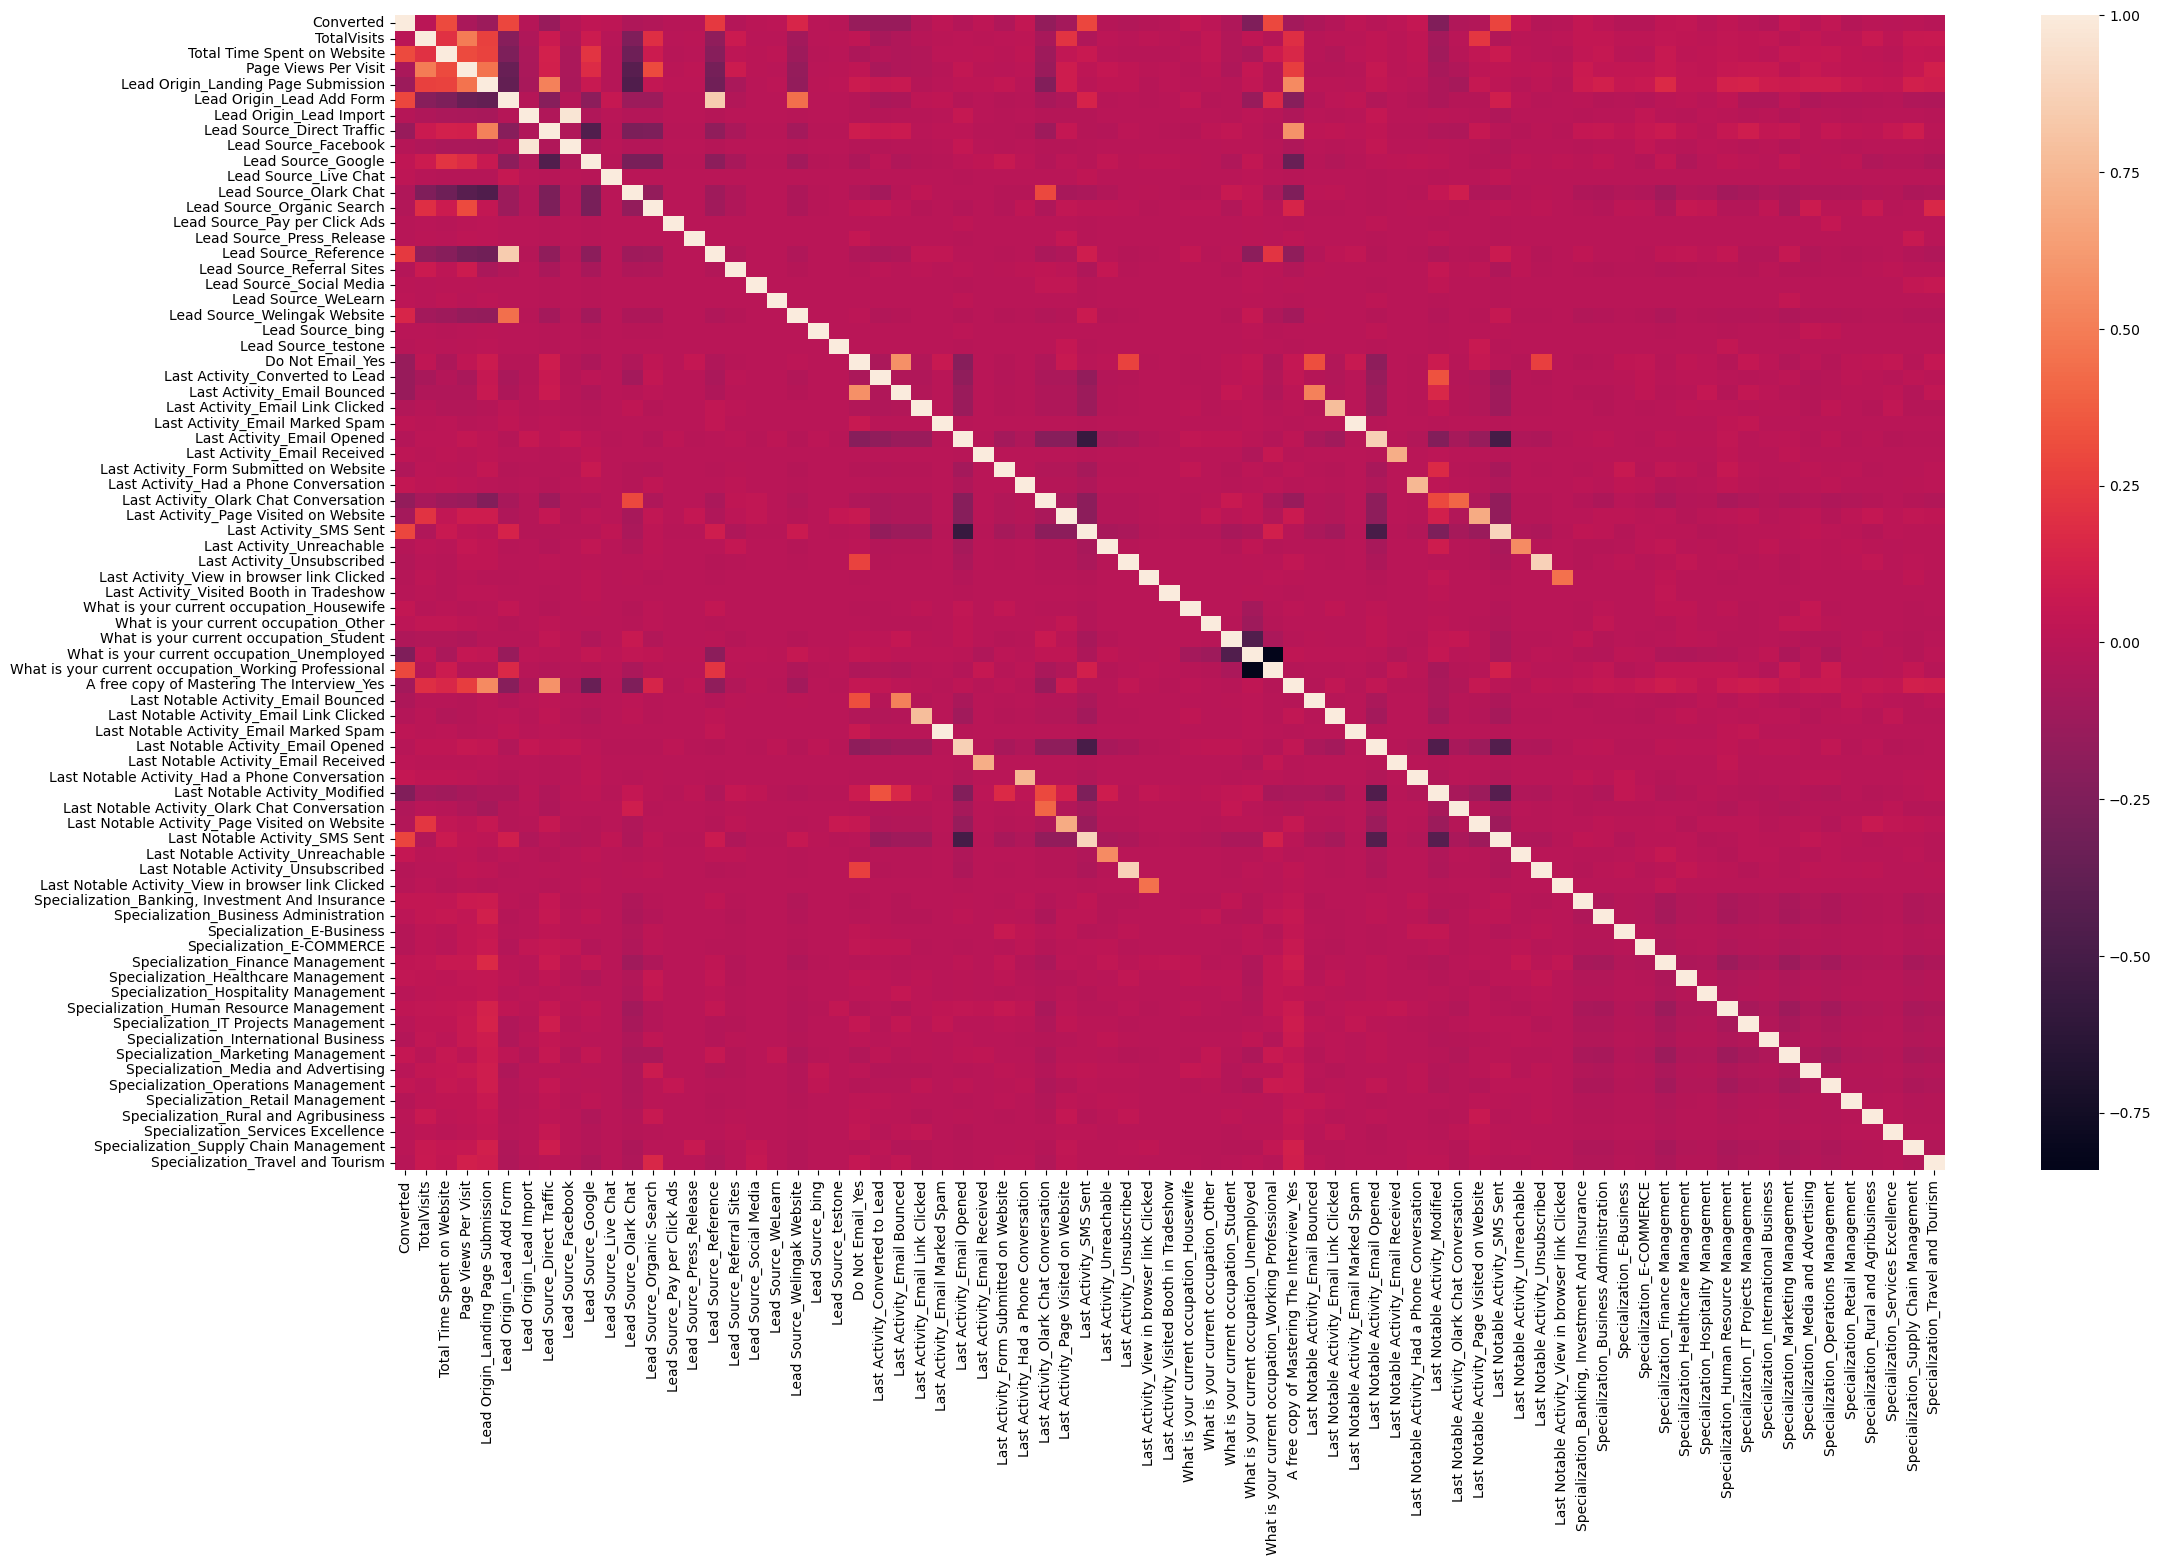

In [56]:
plt.figure(figsize = (25,15))
sns.heatmap(lead_df.corr())
plt.show()

    Given the number of features present in dataset, plotting a heatmap is not really helpful.
    RFE seems a better approach to reduce the number of variable and get the most significant ones

### Model Building
    Proceeding with logistic regression model and selecting variables using RFE

In [57]:
# Initiating the LogisticRegression in logreg
logreg = LogisticRegression()

In [58]:
# Selecting the most significant 15 variables using RFE
rfe = RFE(logreg,n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [59]:
# Checking the most significant 15 variables selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', False, 16),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 41),
 ('Lead Source_Direct Traffic', False, 31),
 ('Lead Source_Facebook', False, 40),
 ('Lead Source_Google', False, 38),
 ('Lead Source_Live Chat', False, 51),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 36),
 ('Lead Source_Pay per Click Ads', False, 57),
 ('Lead Source_Press_Release', False, 54),
 ('Lead Source_Reference', False, 47),
 ('Lead Source_Referral Sites', False, 37),
 ('Lead Source_Social Media', False, 4),
 ('Lead Source_WeLearn', False, 58),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 52),
 ('Lead Source_testone', False, 42),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clic

In [60]:
# Putting all 15 selecting columns in a temp variable to concat the dataset
col = X_train.columns[rfe.support_]

In [61]:
X_train = X_train[col]

    Inspecting the dataset now after concatinating the 15 most sifnificant columns

In [62]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
4511,0.047619,0.084332,0.133333,0,0,0,0,0,0,0,0,0,0,0,0
5652,0.047619,0.154461,0.066667,0,0,0,0,0,0,0,1,0,0,0,0
3327,0.095238,0.498447,0.266667,0,0,0,0,0,0,0,0,1,0,0,0
5142,0.119048,0.085664,0.333333,0,0,0,0,0,0,0,0,0,0,0,0
2908,0.142857,0.234798,0.400000,0,0,0,0,0,0,0,0,0,0,0,0


    Building the model using statsmodel and adding constants on train set

In [63]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4494
Model:                            GLM   Df Residuals:                     4478
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2031.6
Date:                Mon, 18 Dec 2023   Deviance:                       4063.2
Time:                        17:26:42   Pearson chi2:                 4.74e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3815
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0560      0.115    -17.910      0.000      -2.281      -1.831
TotalVisits                                              2.9935      0.600      4.990      0.000       1.818       4.169
Total Time Spent on Website                              4.5718      0.187     24.436      0.000       4.205       4.938
Page Views Per Visit                                    -1.5406      0.413     -3.731      0.000      -2.350      -0.731
Lead Origin_Lead Add Form                                3.8978      0.258     15.088      0.000       3.391       4.404
Lead Source_Olark Chat                                   1.4835      0.141     10.554      0.000       1.208       1.759
Lead Source_Welingak Website                             2.2874      1.047      2.185      0.029       0.235       4.340
Do Not Email_Yes                                        -1.4042      0.214     -6.564      0.000      -1.823      -0.985
Last Activity_Converted to Lead                         -1.1047      0.233     -4.734      0.000      -1.562      -0.647
Last Activity_Email Bounced                             -1.0728      0.449     -2.390      0.017      -1.953      -0.193
Last Activity_Had a Phone Conversation                   0.6008      0.864      0.695      0.487      -1.094       2.295
Last Activity_Olark Chat Conversation                   -1.2024      0.188     -6.380      0.000      -1.572      -0.833
Last Activity_SMS Sent                                   1.1811      0.086     13.724      0.000       1.012       1.350
What is your current occupation_Working Professional     2.4937      0.191     13.039      0.000       2.119       2.869
Last Notable Activity_Had a Phone Conversation          22.5588   1.29e+04      0.002      0.999   -2.53e+04    2.53e+04
Last Notable Activity_Unreachable                        2.7496      0.798      3.445      0.001       1.185       4.314
========================================================================================================================
"""

    Based on Pvalue 'Last Notable Activity_Had a Phone Conversation' , 'Last Activity_Had a Phone Conversation' and 
    looks insignificant
    
    Crossverifying and checking again using VIF

In [64]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,4.09
0,TotalVisits,3.55
9,Last Activity_Had a Phone Conversation,2.13
13,Last Notable Activity_Had a Phone Conversation,2.13
1,Total Time Spent on Website,2.03
6,Do Not Email_Yes,1.67
8,Last Activity_Email Bounced,1.62
11,Last Activity_SMS Sent,1.62
3,Lead Origin_Lead Add Form,1.49
5,Lead Source_Welingak Website,1.32


    VIF looks good for all the feature.
    
    getting rid of 'Last Notable Activity_Had a Phone Conversation' due to extreme high Pvalue

In [65]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)
X_train.shape

(4494, 14)

In [66]:
# Refiting the model again
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4494
Model:                            GLM   Df Residuals:                     4479
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2035.4
Date:                Mon, 18 Dec 2023   Deviance:                       4070.7
Time:                        17:26:42   Pearson chi2:                 4.74e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3804
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0578      0.115    -17.933      0.000      -2.283      -1.833
TotalVisits                                              3.0001      0.599      5.009      0.000       1.826       4.174
Total Time Spent on Website                              4.5620      0.187     24.410      0.000       4.196       4.928
Page Views Per Visit                                    -1.5206      0.412     -3.692      0.000      -2.328      -0.713
Lead Origin_Lead Add Form                                3.8964      0.258     15.080      0.000       3.390       4.403
Lead Source_Olark Chat                                   1.4853      0.141     10.571      0.000       1.210       1.761
Lead Source_Welingak Website                             2.2903      1.047      2.187      0.029       0.238       4.342
Do Not Email_Yes                                        -1.4038      0.214     -6.565      0.000      -1.823      -0.985
Last Activity_Converted to Lead                         -1.1020      0.233     -4.725      0.000      -1.559      -0.645
Last Activity_Email Bounced                             -1.0705      0.449     -2.386      0.017      -1.950      -0.191
Last Activity_Had a Phone Conversation                   2.1501      0.703      3.059      0.002       0.773       3.528
Last Activity_Olark Chat Conversation                   -1.2018      0.188     -6.379      0.000      -1.571      -0.833
Last Activity_SMS Sent                                   1.1805      0.086     13.724      0.000       1.012       1.349
What is your current occupation_Working Professional     2.4917      0.191     13.029      0.000       2.117       2.866
Last Notable Activity_Unreachable                        2.7480      0.798      3.443      0.001       1.184       4.312
========================================================================================================================
"""

In [67]:
# Checking the VIF again to be extra sure
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,4.09
0,TotalVisits,3.55
1,Total Time Spent on Website,2.03
6,Do Not Email_Yes,1.67
8,Last Activity_Email Bounced,1.62
11,Last Activity_SMS Sent,1.62
3,Lead Origin_Lead Add Form,1.49
5,Lead Source_Welingak Website,1.32
4,Lead Source_Olark Chat,1.23
10,Last Activity_Olark Chat Conversation,1.19


    Feature selection looks good

### Model Evaluation

    Since feature selection looks good and VIF/Pvalues are also under threshold.
    Time to make predinction with final set of features

In [68]:
# Using 'predict' to predict the probabilities on the train set X_train and y_train

y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

4511    0.150208
5652    0.074921
3327    0.781912
5142    0.139827
2908    0.237520
2746    0.647491
263     0.689026
6249    0.055150
973     0.386772
54      0.875071
dtype: float64

In [69]:
#Reshaping the predictions into array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.15020789, 0.07492119, 0.781912  , 0.139827  , 0.23752019,
       0.64749101, 0.68902635, 0.0551499 , 0.38677186, 0.87507148])

### Creating a dataframe consiting of converted values and there probablity

In [70]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.150208
1,0,0.074921
2,0,0.781912
3,0,0.139827
4,0,0.237520


### Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

In [71]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head(10)

,Converted,Conversion_Prob,Predicted
0,0,0.150208,0
1,0,0.074921,0
2,0,0.781912,1
3,0,0.139827,0
4,0,0.237520,0
5,0,0.647491,1
6,1,0.689026,1
7,0,0.055150,0
8,0,0.386772,0
9,1,0.875071,1


### Evaluating the Model
#### Creating the Confusion Matrix

    Now that the dataframe with actual and predicted is ready, Creating the confusion matrix

In [72]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1949  392]
 [ 539 1614]]


In [73]:
# checking the overall accuracy of the model now

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7928348909657321


    Model seems accurate enough
    Now evaluating other metrics

In [74]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [75]:
# Calculate the sensitivity

TP/(TP+FN)

0.7496516488620529

In [76]:
# Calculate the specificity

TN/(TN+FP)

0.8325501922255446

### Finding the Optimal Cutoff

    0.5 was just arbitrary to loosely check the model performace.
    Now to get the good results we need to optimise the threshold.
    Plotting the ROC curve to check the AUC that we get.

In [77]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [78]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

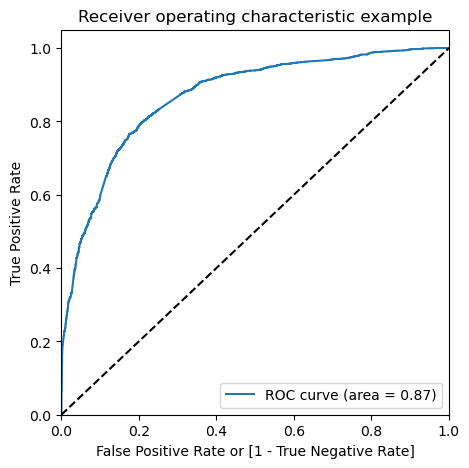

In [79]:
# Calling the ROC function to get AUC (area under curve)

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

    AUC is 0.87 or 87% which is quite good
    From the looks and stats, The model seems to be working optimally
    Checking the sensitivity and specificity tradeoff for the optimal cutoff point

In [80]:
# Creating columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.150208,0,1,1,0,0,0,0,0,0,0,0
1,0,0.074921,0,1,0,0,0,0,0,0,0,0,0
2,0,0.781912,1,1,1,1,1,1,1,1,1,0,0
3,0,0.139827,0,1,1,0,0,0,0,0,0,0,0
4,0,0.237520,0,1,1,1,0,0,0,0,0,0,0


In [81]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity
# at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.479083  1.000000  0.000000
0.1   0.1  0.557855  0.991175  0.159334
0.2   0.2  0.718959  0.937761  0.517727
0.3   0.3  0.765243  0.909893  0.632208
0.4   0.4  0.792390  0.810033  0.776164
0.5   0.5  0.792835  0.749652  0.832550
0.6   0.6  0.783044  0.686020  0.872277
0.7   0.7  0.743881  0.551788  0.920547
0.8   0.8  0.716066  0.457966  0.953439
0.9   0.9  0.647530  0.281003  0.984622


    Plotting the same as well to visualise cutoff point

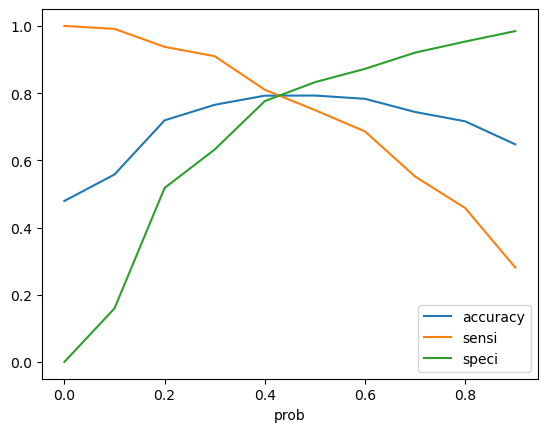

In [82]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

    The cutoff seems to be around value of 0.41
    Setting the cutoff as 0.41 from 0.5 now

In [83]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.41 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.150208,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.074921,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.781912,1,1,1,1,1,1,1,1,1,0,0,1
3,0,0.139827,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.237520,0,1,1,1,0,0,0,0,0,0,0,0


In [84]:
# Checking the accuracy now after optimising the Cutoff point

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7923898531375166

In [85]:
# Create the confusion matrix once again with the new Cutoff Point

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1831,  510],
       [ 423, 1730]], dtype=int64)

In [86]:
# Evaluating the other metrics as well with the new confusion matrix

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [87]:
# Sensitivity

TP/(TP+FN)

0.8035299581978634

In [88]:
# Specificity

TN/(TN+FP)

0.7821443827424178

    The Cutoff point seems to be good and the model seems to be working well

### Making Predictions on Test Set now
    Time to see how the model seems to be working against the test set

In [89]:
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [90]:
X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
2668,0.095238,0.676431,0.133333,0,0,0,0,0,0,0,0,0,0,0,0
1131,0.071429,0.356414,0.200000,0,0,0,1,0,0,0,0,0,0,0,0
841,0.214286,0.536174,0.600000,0,0,0,0,0,0,0,0,0,0,0,0
5504,0.071429,0.764314,0.100000,0,0,0,0,0,0,0,0,1,0,0,0
5653,0.071429,0.456724,0.200000,0,0,0,0,0,0,0,0,1,0,0,0


In [91]:
print(X_test.shape)

(1926, 15)


In [92]:
# Adding constants to X_test

X_test_sm = sm.add_constant(X_test[col])

In [93]:
X_test_sm.head()

,const,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
2668,1.0,0.095238,0.676431,0.133333,0,0,0,0,0,0,0,0,0,0,0,0
1131,1.0,0.071429,0.356414,0.200000,0,0,0,1,0,0,0,0,0,0,0,0
841,1.0,0.214286,0.536174,0.600000,0,0,0,0,0,0,0,0,0,0,0,0
5504,1.0,0.071429,0.764314,0.100000,0,0,0,0,0,0,0,0,1,0,0,0
5653,1.0,0.071429,0.456724,0.200000,0,0,0,0,0,0,0,0,1,0,0,0


In [94]:
# Dropping the not needed features from X_test

X_test.drop(['Last Notable Activity_Had a Phone Conversation'], 1, inplace = True)

In [95]:
# Checking the shapes of test and train once just to be sure
print('Shape of Training set : ', X_train.shape,'\nShape of Test set : ',X_test.shape)

Shape of Training set :  (4494, 14) 
Shape of Test set :  (1926, 14)


In [96]:
y_test_pred = res.predict(sm.add_constant(X_test))

In [97]:
y_test_pred[:10]

2668    0.752322
1131    0.127255
841     0.529644
5504    0.935338
5653    0.753330
261     0.687306
4558    0.047753
3745    0.862779
3996    0.109723
6044    0.160296
dtype: float64

In [98]:
# Converting the y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [99]:
y_pred_1.head()

,0
2668,0.752322
1131,0.127255
841,0.529644
5504,0.935338
5653,0.753330


In [100]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [101]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [102]:
# Checking the y_pred_final to see the final test dataframe
y_pred_final.head()

,Converted,0
0,0,0.752322
1,1,0.127255
2,0,0.529644
3,0,0.935338
4,1,0.753330


In [103]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [104]:
# Checking the y_pred_final to see the final test dataframe
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.752322
1,1,0.127255
2,0,0.529644
3,0,0.935338
4,1,0.753330


In [105]:
# Make predictions on the test set using 0.41 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.752322,1
1,1,0.127255,0
2,0,0.529644,1
3,0,0.935338,1
4,1,0.753330,1


    Checking the overall Accuracy on test set

In [106]:
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7777777777777778

    Creating a confusion matrix to check the specificity and sensitivity

In [107]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[748, 240],
       [188, 750]], dtype=int64)

In [108]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [109]:
# Sensitivity
TP / float(TP+FN)

0.7995735607675906

In [110]:
# Specificity
TN / float(TN+FP)

0.757085020242915

### Precision-Recall View

    Building the training model using the precision-recall view as well

In [111]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[1949,  392],
       [ 539, 1614]], dtype=int64)

#### Precision
TP / TP + FP

In [112]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8045862412761715

#### Recall
TP / TP + FN

In [113]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7496516488620529

### Precision and recall tradeoff

In [114]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 4489    0
 4490    0
 4491    1
 4492    0
 4493    0
 Name: Converted, Length: 4494, dtype: int64,
 0       0
 1       0
 2       1
 3       0
 4       0
        ..
 4489    0
 4490    1
 4491    0
 4492    0
 4493    0
 Name: Predicted, Length: 4494, dtype: int64)

In [115]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

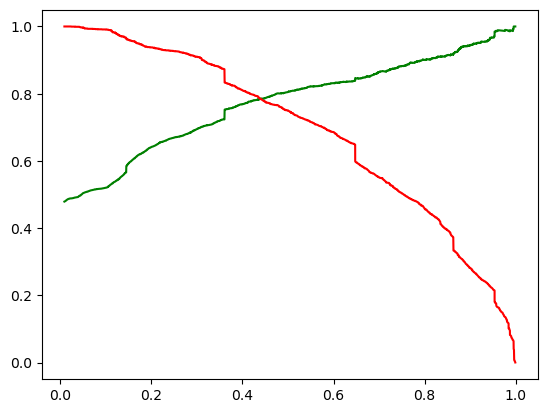

In [116]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

    Cutoff seems to be around 0.41 or 0.42
    selecting 0.42 as Cutoff

In [117]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.150208,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.074921,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.781912,1,1,1,1,1,1,1,1,1,0,0,1
3,0,0.139827,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.237520,0,1,1,1,0,0,0,0,0,0,0,0


In [118]:
# Checking the accuracy now
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7939474855362706

In [119]:
# Creating the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1880,  461],
       [ 465, 1688]], dtype=int64)

In [120]:
# Evaluating the other metrics as well
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [121]:
#Precision
TP/(TP+FP)

0.7854816193578409

In [122]:
#Recall
TP/(TP+FN)

0.7840222944728286

    The CutOff point seems good

### Making Predictions on the Test Set

    Time to make predictions against test set now

In [123]:
# Making predictions and storing it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [124]:
y_test_pred[:10]

2668    0.752322
1131    0.127255
841     0.529644
5504    0.935338
5653    0.753330
261     0.687306
4558    0.047753
3745    0.862779
3996    0.109723
6044    0.160296
dtype: float64

In [125]:
# Converting y_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
2668,0.752322
1131,0.127255
841,0.529644
5504,0.935338
5653,0.753330


In [126]:
# Converting y_test to a dataframe
y_test_df = pd.DataFrame(y_test)

In [127]:
# Removing indexes for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending them together
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

# Renaming the column 0
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.752322
1,1,0.127255
2,0,0.529644
3,0,0.935338
4,1,0.753330


In [128]:
# Make predictions on the test set using 0.42 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [129]:
# Checking y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.752322,1
1,1,0.127255,0
2,0,0.529644,1
3,0,0.935338,1
4,1,0.753330,1


In [130]:
# Checking the overall accuracy now

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7798546209761164

In [131]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[757, 231],
       [193, 745]], dtype=int64)

In [132]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [133]:
# Precision

TP/(TP+FP)

0.7633196721311475

In [134]:
# Recall

TP/(TP+FN)

0.7942430703624733